In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
import time

In [2]:
dataset_dir = '../Data/LANL_Earthquake_prediction/'
train_dir = dataset_dir + 'train.csv'

In [3]:
print('Reading CSV with Dask')
# t0 = time.time()
# df = dd.read_csv(train_dir)
# t1 = time.time()
# print('time: %.4f s' % (t1-t0))
print('time: %.4f s' % 0.0498)

Reading CSV with Dask
time: 0.0498 s


In [4]:
print('Counting numer of rows with Dask')
# t0 = time.time()
# print(df.acoustic_data.count().compute())
# t1 = time.time()
# print('time: %.4f s' % (t1-t0))
print('time: %.4f s' % 24.2625)

Counting numer of rows with Dask
time: 24.2625 s


In [5]:
print('Reading CSV with Pandas')
t0 = time.time()
df = pd.read_csv(train_dir)
t1 = time.time()
print('time: %.4f s' % (t1-t0))

Reading CSV with Pandas
time: 103.4064 s


In [6]:
print('Counting numer of rows with Pandas')
t0 = time.time()
num_total = df.acoustic_data.count()
print('Number of total samples: %d' % num_total)
t1 = time.time()
print('time: %.4f s' % (t1-t0))

Counting numer of rows with Pandas
Number of total samples: 629145480
time: 1.6468 s


In [7]:
sampling_rate = 1000
subsampled = df.iloc[::sampling_rate, :]
num_rows = subsampled.acoustic_data.count()
print('Number of subsamples: %d' % num_rows)

Number of subsamples: 629146


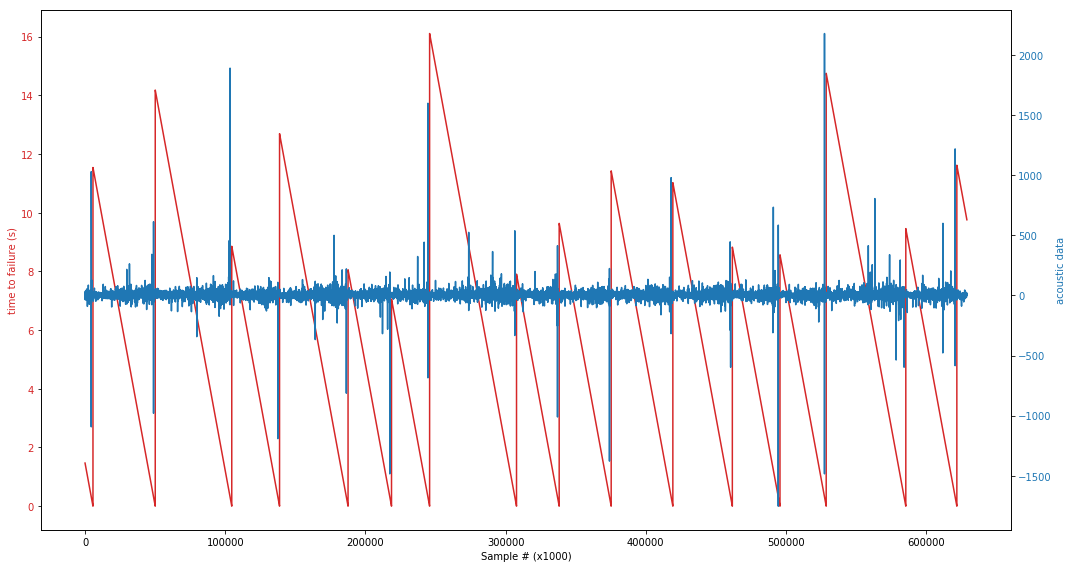

In [8]:
sample_num = np.arange(num_rows)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Sample # (x%d)'%sampling_rate)
ax1.set_ylabel('time to failure (s)', color=color)
ax1.plot(sample_num, subsampled.time_to_failure, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('acoustic data', color=color)  # we already handled the x-label with ax1
ax2.plot(sample_num, subsampled.acoustic_data, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.gcf().set_size_inches(15, 8)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [9]:
df['dtime'] = df['time_to_failure'] - df['time_to_failure'].shift(1)
segments = df.loc[df['dtime'] > 3]

In [10]:
print('Number of earthquakes: %d' % len(segments))
print('Information on where new segments start:')
print(segments)

Number of earthquakes: 16
Information on where new segments start:
           acoustic_data  time_to_failure      dtime
5656574                4          11.5408  11.540005
50085878               1          14.1806  14.179905
104677356              4           8.8567   8.855905
138772453             -4          12.6940  12.692905
187641820              2           8.0555   8.054905
218652630              4           7.0590   7.057905
245829585              2          16.1074  16.106905
307838917              2           7.9056   7.904905
338276287              3           9.6371   9.636905
375377848              0          11.4264  11.425905
419368880             -3          11.0242  11.024005
461811623              3           8.8281   8.828005
495800225              2           8.5660   8.565905
528777115              2          14.7518  14.750905
585568144              7           9.4595   9.458905
621985673              2          11.6186  11.618005
